In [1]:
import sys
from sys import platform
import matplotlib.pyplot as plt

In [2]:
if platform  == 'win32':
    sys.argv=["_", r"P:\rmahajan14\ndte_data\muni_data", "20170101", "20190930"]
if platform == 'linux' or platform == 'linux2':
    def full_path(p):
        return os.path.abspath(os.path.expanduser(p))
    sys.argv=["_", r"/mnt/d/DiDi_Ride_Data/data", r"/mnt/d/DiDi_Ride_Data/Ride_Data_Cache"]

In [3]:
from loader1 import *
from utils import *
from common import *
from experiment2 import *
# from sys import platform

import warnings
warnings.filterwarnings('ignore')

/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/final_df_reg.msgpack exists


/mnt/c/Users/aksmi/Desktop/Drive/Fall '19/Capstone/capstone_didi/experiment2.py:173: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  df_final = get_final_df_reg()


In [4]:
merged_orders = merge_order_df()

/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/merged_orders.msgpack exists


In [5]:
merged_orders

,order_id,ride_start_timestamp,ride_stop_timestamp,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,ride_duration,driver_id
0,00003ad9f837aca8ecdb9ae0729d0866,2016-11-01 14:35:44,2016-11-01 14:48:01,104.107101,30.699385,104.054980,30.688850,12.283333,64ee983f9979db09cb2586ec3893c467
1,0000c5bb7976b3dfe0fefa060265bdca,2016-11-01 15:06:22,2016-11-01 15:33:26,104.065170,30.702790,104.068280,30.666830,27.066667,19aa2c3cb2b05daf4ed06a3849c2c43c
2,0000f2c8aa21f2599a82923f317334bc,2016-11-01 19:38:49,2016-11-01 19:50:28,104.050859,30.687837,104.057100,30.662350,11.650000,15045dc2301012dda9cb8e98f4723efd
3,000102a3f8b31b3bc888572108888727,2016-11-01 11:22:02,2016-11-01 11:50:06,104.012450,30.622080,104.049190,30.755740,28.066667,53332bf0536f84453f0ab40a91774101
4,00017e395c1e449231b86f9149a793e5,2016-11-01 00:19:20,2016-11-01 00:34:41,104.092920,30.685830,103.990711,30.670803,15.350000,0dafbd548725f540988c5aa2554d782e
...,...,...,...,...,...,...,...,...,...
215023,fffe5967b6fdeab48c68f0ca2b330d61,2016-11-30 17:51:34,2016-11-30 18:47:20,103.897790,30.806530,104.042230,30.666520,55.766667,b7a5478a20a23993fde23f7cba244015
215024,fffe9e5c6d8030fd62448b8e53aacf47,2016-11-30 03:50:50,2016-11-30 04:22:22,104.073740,30.663010,103.928100,30.777570,31.533333,c6b7b37206ee6c6a38bb88a7c1655283
215025,fffeb486c95ea127189ae560038c6c3a,2016-11-30 12:27:08,2016-11-30 13:10:21,104.073912,30.695677,104.053270,30.765540,43.216667,d242eea3b731a2d1be5ecbd217fbe971
215026,ffff5cc2253bf6bca72dcb1e8a1958e6,2016-11-30 15:38:33,2016-11-30 15:49:03,104.113684,30.649077,104.099270,30.667460,10.500000,8e64c70c1c85b58dfcf79e7f939a8e17


### Remove rides with ride times greater than 3 hours

In [6]:
merged_orders = merged_orders[merged_orders.ride_duration <= 180]

In [7]:
# Check all diffs in start and end times
driver_start_times = merged_orders.loc[:, ['driver_id', 'ride_start_timestamp', 'ride_stop_timestamp', 'order_id']]\
            .drop_duplicates()
driver_start_times.sort_values(['driver_id', 'ride_start_timestamp'],
                               inplace=True)
driver_start_times['stop_time_shifted'] = driver_start_times.groupby(
    'driver_id')['ride_stop_timestamp'].shift(1)
driver_start_times['diff'] = driver_start_times[
    'ride_start_timestamp'] - driver_start_times['stop_time_shifted']

In [8]:
driver_start_times.sort_values(['driver_id', 'ride_start_timestamp']).head(100)

,driver_id,ride_start_timestamp,ride_stop_timestamp,order_id,stop_time_shifted,diff
175165,0000131d486b69eb77ab6e9e7cca9f4c,2016-11-01 11:57:05,2016-11-01 12:13:18,f727597b61fc2f0141aadecf2a3b5ee0,NaT,NaT
90347,0000131d486b69eb77ab6e9e7cca9f4c,2016-11-01 12:33:05,2016-11-01 12:49:04,804a1a47f2b10dc36b7e909d9b977f02,2016-11-01 12:13:18,00:19:47
156956,0000131d486b69eb77ab6e9e7cca9f4c,2016-11-01 12:58:45,2016-11-01 13:42:08,dd9b252638479fb784b705492bdf1a65,2016-11-01 12:49:04,00:09:41
2327,00002724a19c5f6a54ae8d60a378997e,2016-11-28 00:19:16,2016-11-28 00:54:04,03014caf7353cb92868d78b143bca071,NaT,NaT
64719,000042288ba964aa04d14869bd56efb6,2016-11-28 19:49:07,2016-11-28 20:00:58,504e0d59e3c0ae899a85c5e0551cb2b3,NaT,NaT
...,...,...,...,...,...,...
159084,0001681811178a09aa002f607c89735b,2016-11-28 21:57:31,2016-11-28 22:13:46,c465c5f4fd5cc991e08363014a94627b,2016-11-28 00:41:44,21:15:47
39259,00016e54648071044515d4ff3bd3ae18,2016-11-17 07:54:11,2016-11-17 08:39:17,30b9fd23e5665bf65486032031a11a36,NaT,NaT
134435,00016e54648071044515d4ff3bd3ae18,2016-11-17 13:19:47,2016-11-17 13:36:33,a671bbaf869d56a72c44153a536b654b,2016-11-17 08:39:17,04:40:30
58077,00016e54648071044515d4ff3bd3ae18,2016-11-17 13:40:27,2016-11-17 13:51:59,47dc5113cadb120b2e9d922ee2c96271,2016-11-17 13:36:33,00:03:54


In [9]:
driver_start_times_no_na = driver_start_times.dropna()

In [10]:
driver_start_times_no_na.shape

(4923622, 6)

In [11]:
driver_start_times_no_na['diff'] = driver_start_times_no_na['diff'].dt.total_seconds() / 60

In [12]:
driver_start_times_no_na.head()

,driver_id,ride_start_timestamp,ride_stop_timestamp,order_id,stop_time_shifted,diff
90347,0000131d486b69eb77ab6e9e7cca9f4c,2016-11-01 12:33:05,2016-11-01 12:49:04,804a1a47f2b10dc36b7e909d9b977f02,2016-11-01 12:13:18,19.783333
156956,0000131d486b69eb77ab6e9e7cca9f4c,2016-11-01 12:58:45,2016-11-01 13:42:08,dd9b252638479fb784b705492bdf1a65,2016-11-01 12:49:04,9.683333
5326,000042288ba964aa04d14869bd56efb6,2016-11-28 20:10:49,2016-11-28 20:20:25,06c7c82d8b15810ce80c47d0d3243ee1,2016-11-28 20:00:58,9.850000
118578,000042288ba964aa04d14869bd56efb6,2016-11-28 20:27:49,2016-11-28 21:02:33,929d619cd18a44b9ecdd259d71a13f7f,2016-11-28 20:20:25,7.400000
34798,000042288ba964aa04d14869bd56efb6,2016-11-28 22:32:06,2016-11-28 22:41:15,2b2880e2eb541443e747ecc649f67861,2016-11-28 21:02:33,89.550000


In [13]:
driver_start_times_no_na.describe()

,diff
count,4.923622e+06
mean,5.726774e+01
std,1.435211e+02
min,-1.638500e+02
25%,5.433333e+00
50%,1.033333e+01
75%,3.720000e+01
max,1.418300e+03


The mean difference between two consecutive pickup times is skewed right because of many drivers taking overnight breaks between two rides. A better estimate for the value of $\tau$ is the median difference of times between rides

In [52]:
mean_diff = driver_start_times_no_na['diff'].mean()

In [14]:
tau = driver_start_times_no_na['diff'].median()

This can be used to estimate the scale paramater for the decay by which the probability of a driver staying online decreases

$$\tau + \frac{1}{\lambda} = E(diff)$$

In [53]:
lmbd = 1./(mean_diff - tau)

In [55]:
shape = 1./lmbd

In [56]:
shape

46.93440354140374

In [71]:
# Defining function to determine online staying probability of a driver after time t:
from scipy.stats import expon
def idle_time_est(t, tau, shape, size):
    
    # sample from time diff distribution
    t_s = tau + np.random.exponential(scale=shape, size=size)
    
    indicator = t <= t_s
    indicator = 1 - indicator
    i_time = t - t_s
    idle_time = indicator * i_time
    
    return idle_time

## Adding column for estimated idle times

In [75]:
size = driver_start_times_no_na.shape[0]
driver_start_times_no_na['idle_time'] = idle_time_est(driver_start_times_no_na['diff'], tau, shape, size=size)

In [79]:
driver_start_times_no_na.sample(100)

,driver_id,ride_start_timestamp,ride_stop_timestamp,order_id,stop_time_shifted,diff,idle_time
35105,574e8df406d05e4e5f353fbc1520817c,2016-11-07 20:31:40,2016-11-07 20:42:01,2f62597bb27c18664e313614d52107bb,2016-11-07 20:06:51,24.816667,5.901138
5761,bada66f956688bd25a705a7fa3a15341,2016-11-01 10:04:03,2016-11-01 10:42:11,081a04db52a230e02d399e9837cd3dfd,2016-11-01 09:54:34,9.483333,-0.000000
76975,9af662a1ca2e1285be1278d095acf838,2016-11-05 16:38:56,2016-11-05 17:14:55,5e4ef1d086a2599c3a381c8ab85f297d,2016-11-05 16:01:05,37.850000,24.571417
43872,3063486c7452bac26c1d4fcc330a3672,2016-11-03 16:18:53,2016-11-03 16:44:09,3ba145ee40bd6cc25770ccd6cd9183d4,2016-11-03 15:39:21,39.533333,3.574437
179804,a9b287e707efabf5cc326820c4ceb5f8,2016-11-23 21:50:06,2016-11-23 22:02:10,e151b82641d8ac3b12395371019bbaa6,2016-11-23 21:33:27,16.650000,-0.000000
...,...,...,...,...,...,...,...
76031,2d434c87eabc0512a1d21a2b5131d47a,2016-11-11 13:47:58,2016-11-11 14:28:58,5a61de2f4abaa59b4cbb015ad99f7052,2016-11-11 12:02:40,105.300000,-0.000000
184203,b4c11e3a04edef139de55a17537c5504,2016-11-14 21:53:04,2016-11-14 22:39:53,f0ef0009bc7cd448356269fc1539ed94,2016-11-14 21:49:38,3.433333,-0.000000
159084,fd793e89f89b94ea49dfc146e269ed66,2016-11-08 09:40:30,2016-11-08 10:15:57,d20cec0c116df9616ee85ad97e858689,2016-11-08 08:41:24,59.100000,-0.000000
79947,481d203b78d583e5e8e7a1dc3a692e39,2016-11-30 17:55:43,2016-11-30 18:14:56,5f188189ff4d8bd090ca9d67efaf83c5,2016-11-30 17:43:31,12.200000,-0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c27e96a90>]],
      dtype=object)

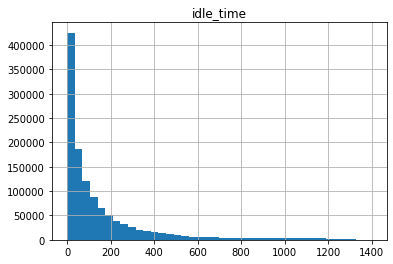

In [82]:
driver_start_times_no_na[driver_start_times_no_na.idle_time > 0].hist('idle_time', bins=40)

In [83]:
driver_start_times_no_na[driver_start_times_no_na.idle_time >= 1000]

,driver_id,ride_start_timestamp,ride_stop_timestamp,order_id,stop_time_shifted,diff,idle_time
159084,0001681811178a09aa002f607c89735b,2016-11-28 21:57:31,2016-11-28 22:13:46,c465c5f4fd5cc991e08363014a94627b,2016-11-28 00:41:44,1275.783333,1114.680950
58351,0008ddce4f6d06f0f49550b7bce8649a,2016-11-12 22:37:54,2016-11-12 22:53:24,46b5cc95a43646e1785ce203e9259359,2016-11-12 03:24:05,1153.816667,1127.138560
98527,000a89b924155f3ccf532c7e2de1c60a,2016-11-21 19:34:03,2016-11-21 19:57:05,7f3d9fe8b1a2178fcb5ef02b394a2532,2016-11-21 00:30:02,1144.016667,1075.794767
104602,000c63e7fdb9fd3589701a4a9d81eb1f,2016-11-11 20:25:04,2016-11-11 20:58:48,7c5a1a889dad8a362930135c736e2348,2016-11-11 01:38:04,1127.000000,1115.316032
86282,000e19b26e3a3be5d89d579ea69ccbe8,2016-11-28 22:12:16,2016-11-28 22:39:53,6ac19c9aba292ff102b4a5e025fe4e27,2016-11-28 00:24:51,1307.416667,1294.658388
...,...,...,...,...,...,...,...
188991,ffeb9840707131d88b2a8a1041c4108f,2016-11-25 21:58:02,2016-11-25 22:19:36,db05300ea3a97537f075da321a54c0eb,2016-11-25 02:24:48,1173.233333,1095.999703
173091,ffec57696c15eab20d5d76769793c117,2016-11-21 23:06:05,2016-11-21 23:15:48,dfe984800e0d56c4b6d3a607f1d32ef6,2016-11-21 00:52:59,1333.100000,1320.155754
173021,ffee1d4bf80293139718d8d4ebf99965,2016-11-12 22:14:52,2016-11-12 22:36:21,d23635931c57bbf830babed4915bbca5,2016-11-12 02:33:43,1181.150000,1149.113741
60169,fff54e25d5646aebfa5c38e62667b1a4,2016-11-09 23:12:29,2016-11-09 23:28:26,4f94ad7320f44cac754a378c299833c9,2016-11-09 02:42:38,1229.850000,1198.544461
